(lighting)=
# Energieeffiziente Beleuchtung einschätzen

:::{admonition} **Lernziele**
- Beleuchtungsqualität beschreiben
- mithilfe von radiometrischen Größen und Farbwiedergabe
- um energieeffiziente Beleuchtung zu bewerten
:::

## python konfigurieren

### Module importieren

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import shutil

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('shutil', shutil)

Versionen der verwendeten python-Module: 
numpy 2.1.1
matplotlib 3.9.2
pandas 2.2.3
shutil <module 'shutil' from '/home/franzi/.pyenv/versions/miniconda3-latest/lib/python3.12/shutil.py'>


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
if shutil.which('latex'): plt.rcParams['text.usetex'] = True

## Licht als Nutzenergie

Anwendungen
- Schreibtisch
 - min. 500 lx
- Werkstatt
 - grobe Arbeiten: min. 300 lx
 - feine Arbeiten: min. 500 lx
- Bildschirm
 - ...
- ...

<br>

In [3]:
from jupyterquiz import display_quiz
from pygit2 import Repository

#repository_name = Repository('.').head.shorthand  # gibt den Namen des aktuellen repo wieder
repository_name = 'master'
quiz_main_path = 'https://gitlab.com/oer4renewables/systemtechnik-fuer-energieeffizienz/-/raw/' + repository_name + '/files/quiz/'
quiz_name = '10_3_Energieeffiziente_Beleuchtung.json'

display_quiz(quiz_main_path + quiz_name)

<IPython.core.display.Javascript object>

### Strahlungsleistung und Strahlungsfluss

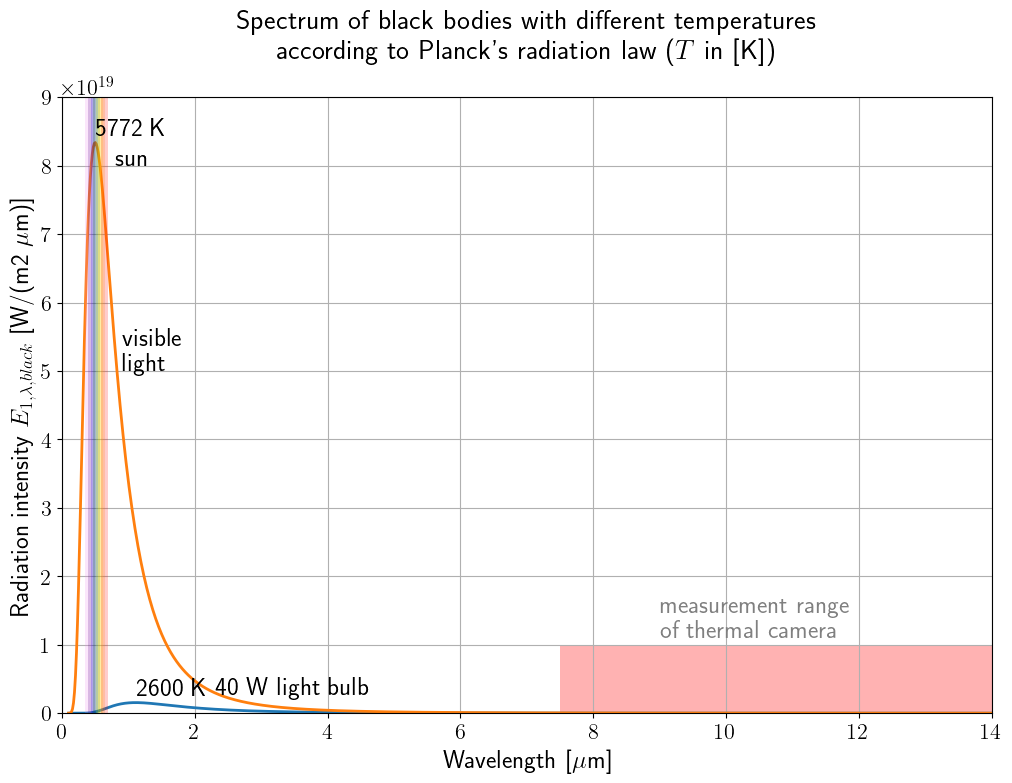

In [4]:
c0=3e8
h=6.6e-34
k=1.38e-23
T=np.array([2600,5772])
lam=np.linspace(1e-7,15e-6,1000) # 1e-7 ungefähr Null, sonst Div durch 0
plt.figure(figsize=(12,8))

for t in T:
    E=2*np.pi*h*c0**2/((lam**5)*(np.exp(h*c0/(lam*k*t))-1))
    mx=1e6*np.nanmax(E)
    plt.plot(1e6*lam,1e6*E)
    plt.annotate(str(int(t))+' K',xy=(2898/t,mx+1e18))
plt.xlabel(r'Wavelength [$\mu$m]')
plt.ylabel('Radiation intensity ' r'$E_{1,\lambda,black}$ [W/(m2 $\mu$m)]')
plt.title("Spectrum of black bodies with different temperatures \naccording to Planck's radiation law " r"($T$ in [K])" "\n")

lamvis = np.linspace(400e-9, 750e-9, 10) # sichtbare Wellenlängen
colors = ["violet", "indigo", "blue", "green", "yellow", "orange", "red"]
for i in range(len(colors)):
   plt.plot([1e6*lamvis[i],1e6*lamvis[i]], [0,9e19], c=colors[i], lw=5, alpha = 0.2)
plt.text(1.2*1e6*lamvis[-1],5e19,'visible \nlight')
plt.text(.8,8e19,'sun')
lamIRsens = np.linspace(7.5e-6,14e-6,2) # Messbereich Infrarotkamera FLIR
from matplotlib.patches import Rectangle
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((1e6*lamIRsens[0], 0), 1e6*(lamIRsens[-1]-lamIRsens[0]), 1e19,
                      alpha=0.3, facecolor='red'))
plt.text(1.2*1e6*lamIRsens[0],1.1e19,'measurement range \nof thermal camera', color = 'gray')
plt.text(2.3,.27e19,'40 W light bulb')
plt.axis([0,14,0,9e19])
plt.grid()
plt.show()

**Strahlungsleistung $\Phi_e$** = gesamte elektromagnetische Strahlungsleistung, die auf eine Oberfläche auftritt oder von einer Quelle (z. B. Glühbirne, Leuchtdiode) emittiert wird oder von einer Fläche reflektiert wird, Einheit $[\Phi_e] =\text{W}$

**Isotrope Lichtquelle**: strahlt gleichmäßig in alle Richtungen

**Strahlungsleistung (=Strahlungsfluss)**: gesamte abgegebene Strahlung, nicht bezogen auf Richtung oder spektrale Verteilung (Farbe)

**Bestrahlungsstärke $E_e=\frac{d\Phi_e}{dA}$**: bezieht sich auf eine beliebige Empfängerfläche $A$ im Raum, Einheit $[E_e]=\text{W/m}^2$

### Photometrische Größen

**Photometrisch: Beleuchtungsstärke $E_{\lambda} = \frac{d\Phi_{\lambda}}{dA}$**, $[E_{\lambda}] = \text{lx}$

Gewichtung von radiometrischen Größen mit einer Kurve $V(\lambda)$, die die Empfindlichkeit des menschlichen Auges beinhaltet, ergibt photometrische Größen

**Lichtstrom $\Phi_{\lambda} = K_m \cdot \int_{\lambda=380\text{ nm}}^{780\text{ nm}}\Phi_e(\lambda)\cdot V(\lambda)\cdot d\lambda$**: korrespondiert mit der radiometrischen Größe Strahlungsfluss, Lichtwellenlänge $\lambda$, Konstante $K_m = 683\text{ lm/W}$, Einheit Lumen (lm)

**Umrechnung bei monochromatischem Licht**: bei Licht mit $\lambda = 555\text{ nm}$ entspricht eine Strahlungsleistung von $\Phi_e = 1\text{ W}$ einem Lichtstrom von $\Phi_{\lambda} = 683\text{ lm}$

### Spektrale Hellempfindlichkeit $V(\lambda)$ des menschlichen Auges

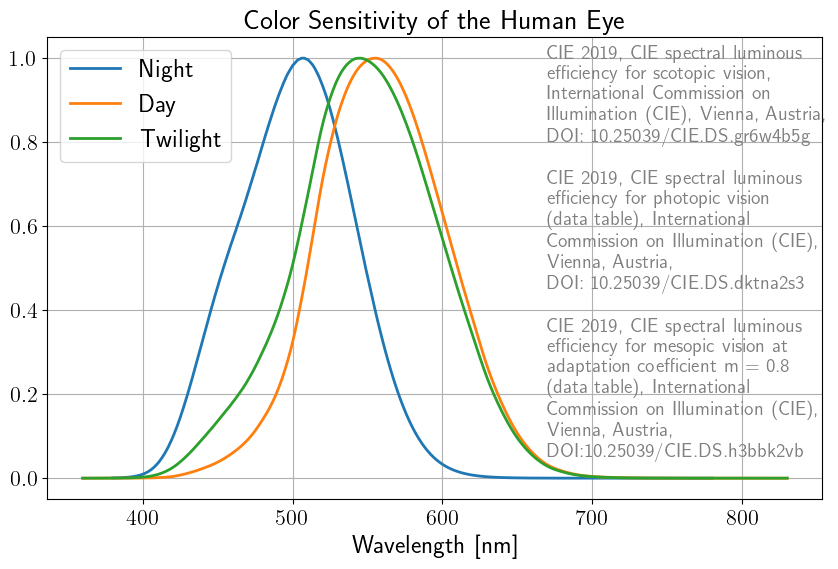

In [5]:
nightsens = pd.read_csv('../data/CIE_sle_scotopic.csv', header = None, names = ['Wavelength [nm]','Night'])
daysens = pd.read_csv('../data/CIE_sle_photopic.csv', header = None, names = ['Wavelength [nm]','Day'])
twilightsens = pd.read_csv('../data/CIE_sle_mesopic_m_0.8.csv', header = None, names = ['Wavelength [nm]','Twilight'])
sens = pd.concat([nightsens,daysens,twilightsens])
sens.plot(x = 'Wavelength [nm]', title = 'Color Sensitivity of the Human Eye', )
plt.text(670,0.8,'CIE 2019, CIE spectral luminous \nefficiency for scotopic vision, \nInternational Commission on \nIllumination (CIE), Vienna, Austria, \nDOI: 10.25039/CIE.DS.gr6w4b5g', color = 'gray', fontsize = 14)
plt.text(670,0.45,'CIE 2019, CIE spectral luminous \nefficiency for photopic vision \n(data table), International \nCommission on Illumination (CIE), \nVienna, Austria, \nDOI: 10.25039/CIE.DS.dktna2s3', color = 'gray', fontsize = 14)
plt.text(670,0.05,'CIE 2019, CIE spectral luminous \nefficiency for mesopic vision at \nadaptation coefficient m = 0.8 \n(data table), International \nCommission on Illumination (CIE), \nVienna, Austria, \nDOI:10.25039/CIE.DS.h3bbk2vb', color = 'gray', fontsize = 14)
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [6]:
from matplotlib import colormaps
# from matplotlib documentation
cmaps = {}
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category}', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=matplotlib.colormaps[name])
        #ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                #transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

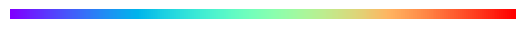

In [7]:
plot_color_gradients('',['rainbow'])

### Farbwiedergabeindex $R_a$ bzw. *Color Rendering Index (CRI)*

Welches Leuchtmittel hat das folgende Spektrum?

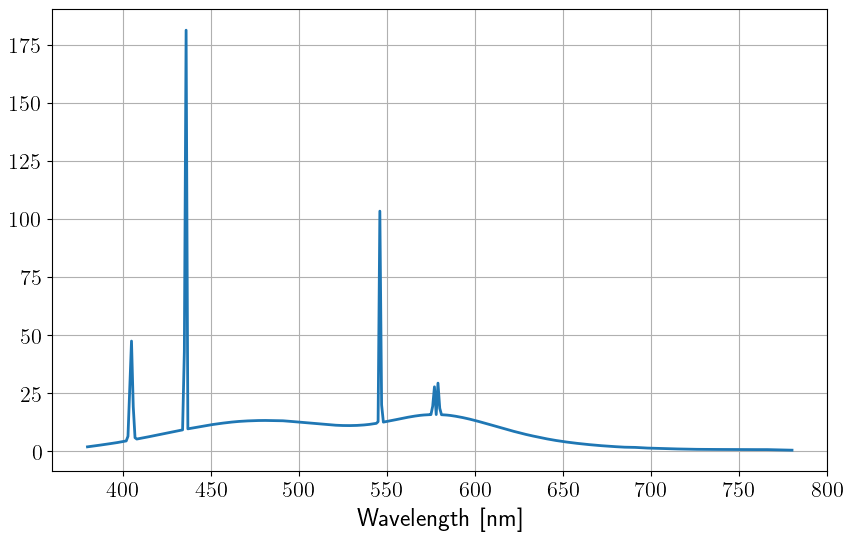

In [18]:
fluorescent = pd.read_csv('https://files.cie.co.at/CIE_illum_FLs_1nm.csv', header = None)
# CIE 2018, Relative spectral power distributions of illuminants representing typical fluorescent lamps, 1nm wavelength steps, International Commission on Illumination, Vienna, Austria, DOI: 10.25039/CIE.DS.54hy6srn
fluorescent.plot(x = 0, y = 1, xlabel = 'Wavelength [nm]', legend = False)
plt.grid()
plt.show()

Und welches Leuchtmittel ist hier zu sehen?

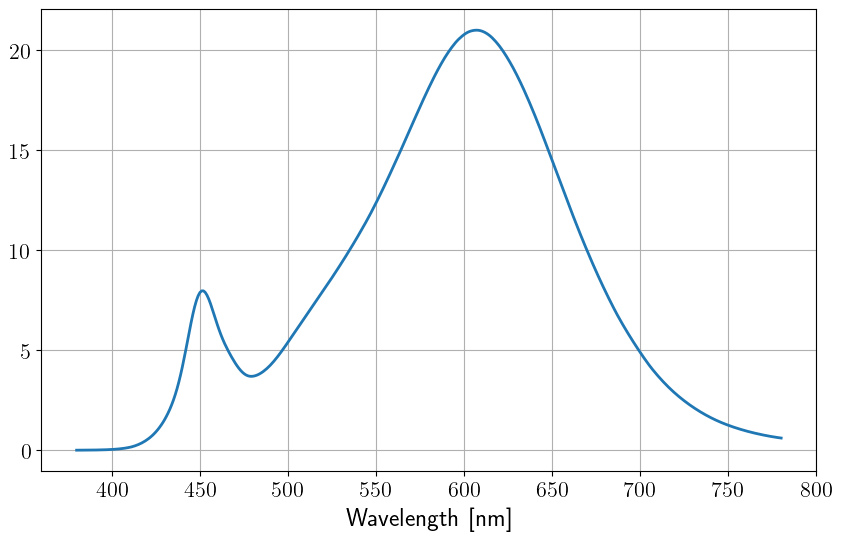

In [17]:
ledlamp = pd.read_csv('https://files.cie.co.at/CIE_illum_LEDs_1nm.csv', header = None)
# CIE 2018, Relative spectral power distributions of illuminants representing typical LED lamps, 1nm spacing, International Commission on Illumination, Vienna, Austria, DOI: 10.25039/CIE.DS.dhcw57sd
ledlamp.plot(x = 0, y = 1, xlabel = 'Wavelength [nm]', legend = False)
plt.grid()
plt.show()

Was fällt bei den beiden Bildern auf https://www.licht.de/de/grundlagen/beleuchtungsqualitaet/farbwiedergabe/ {cite:p}`lichtde_farbwiedergabe_2020` auf?

### Vorgaben für Farbwiedergabeindex $R_a$

<a title="Chris828, Public domain, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:DIN_Test_6169.svg"><img width="512" alt="DIN Test 6169" src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/DIN_Test_6169.svg/512px-DIN_Test_6169.svg.png"></a>

gewichtete Berechnung des $R_a$ anhand der Testfarben $\to$ gute Werte trotz schwachem Rot möglich!

Was ist mit biologischen Lichtwirkungen? Was besagt der Begriff HCL (human centric lighting)?

:::{tip}
**Video (Dauer ca. 5 min.)** [Camping Syncs Internal Clock with Nature](https://www.youtube.com/watch?v=BKQH6T1DZvI)
:::

:::{tip}
**Weiterführende Literatur**: {cite:p}`wosnitza_energieeffizienz_2012`
:::

## Anforderungen an Beleuchtung: Beleuchtungsfunktionen

- Wohlbefinden vermitteln durch Sehkomfort
- Sehleistung auch unter schwierigen Umständen und über längere Zeit sicherstellen

**Daraus ergeben sich Gütemerkmale der Lichttechnik**: 
- **Beleuchtungsstärke $E_{\lambda} (\text{lx})$**, Leuchtdichteverteilung
- Begrenzung der Blendung, Lichtrichtung
- Schatten, **Lichtfarbe**
- Farbwiedergabe der Lampen

**Beleuchtete Gegenstände reflektieren Licht, entsprechend ihrer Farbe.**

**Anwendung z. B. Beleuchtung mit blauem Licht in öffentl. Toiletten** {cite:p}`katja_rudolph_mit_2015`: Da rotes Licht fehlt, sieht man zwar die Toilette, das Waschbecken, etc., aber nicht den Kontrast zwischen den Venen und der Haut - so werden die Toiletten für Junkies unattraktiver.

**Weißes Licht**: 
- Warmweißes Licht: gemütlich, behaglich
- Neutralweißes Licht: Erzeugung sachlicher Stimmung ($\to$ Büro)
- Tageslichtweißes Licht: ab $\geq 1000\text{ lx}$

## Energieeffiziente Beleuchtung

:::{tip}
**Video (Dauer ca. 6 min.)** [Losing the Dark - Flat Screen Version](https://www.youtube.com/watch?v=dd82jaztFIo)
:::

**Kennzahl Lichtausbeute**
\begin{equation}
\eta_{\text{Licht}} = \frac{\Phi_{\lambda}}{P_{\text{elektr.}}} = \frac{\text{Lichtstrom (lm)}}{\text{elektrische Leistung (W)}}    
\end{equation}

**Lebensdauer**: **Kriterium für "end of life" (EOL): Mindestlichtstrom unterschritten**

- **Glühlampen**: 1.000 {cite:p}`wosnitza_energieeffizienz_2012` Betriebsstunden (seit Phoebuskartell 1920er Jahre {cite:p}`anna-lena_gutberlet_geplante_2017`, siehe auch empfehlenswerter Film "Kaufen für die Müllhalde" {cite:p}`wikipedia_kaufen_2020`)
- **Halogenlampen**: 4.000 Betriebsstunden {cite:p}`wosnitza_energieeffizienz_2012`
- **Energiesparlampen** mit integriertem elektronischen Vorschaltgerät (EVG) 15.000 Betriebsstunden {cite:p}`wosnitza_energieeffizienz_2012`
- **LED-Lampen** (LED = light emitting diode): 50.000 Betriebsstunden {cite:p}`wosnitza_energieeffizienz_2012`

## Alterung, z. B. Degradation der Leuchtdichte bei LEDs

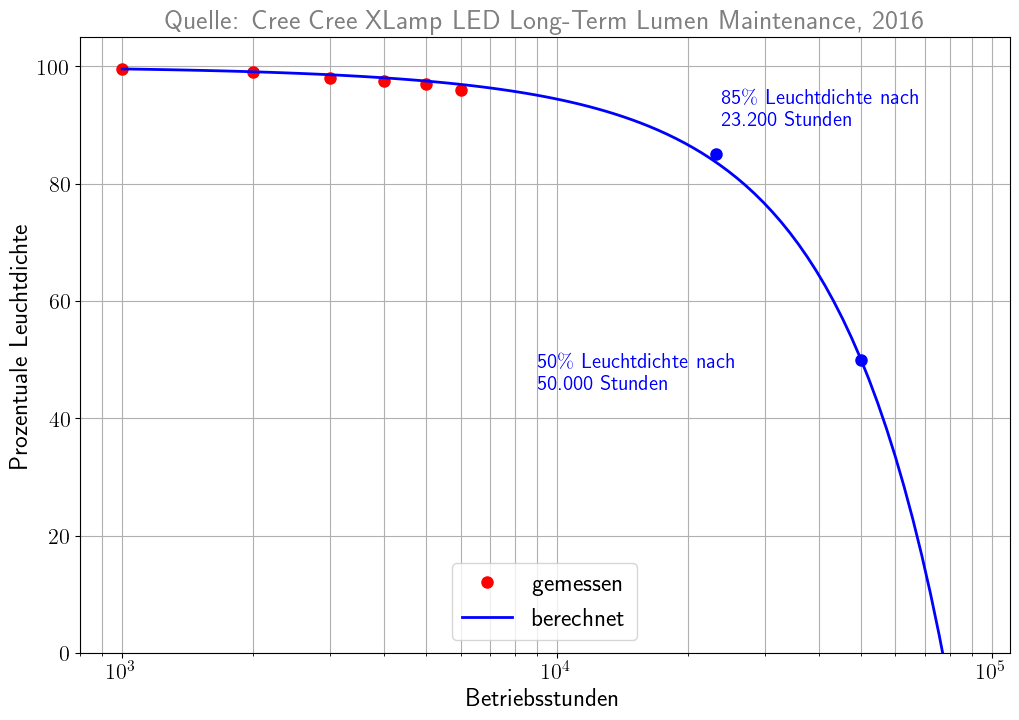

In [10]:
luminousflux_meas = [99.5, 99, 98, 97.5, 97, 96]
hours_meas = [1000, 2000, 3000, 4000, 5000, 6000]
hours_sim = np.geomspace(1000,100000,100)
luminousflux_sim = 100*(1-0.45*hours_sim/np.max(hours_sim)-1.1*hours_sim**2/np.max(hours_sim)**2)
plt.figure(figsize=(12,8))
plt.axis([.8e3,1.1e5,0,105])
plt.semilogx(hours_meas, luminousflux_meas,'ro', label='gemessen')
plt.semilogx(hours_sim, luminousflux_sim, 'b-', label='berechnet')
plt.text(23800,90,r'85$\%$ Leuchtdichte nach ' '\n23.200 Stunden',color='blue', fontsize='15')
plt.semilogx(23200,85,'bo')
plt.text(9000,45,r'50$\%$ Leuchtdichte nach ' '\n50.000 Stunden',color='blue',fontsize='15')
plt.semilogx(50000,50,'bo')
plt.xlabel('Betriebsstunden')
plt.ylabel('Prozentuale Leuchtdichte')
plt.grid(which='both')
plt.legend(loc='lower center')
plt.title('Quelle: Cree Cree XLamp LED Long-Term Lumen Maintenance, 2016',color='gray')
plt.show()

:::{admonition} **AUFGABE**
Nach wie vielen Jahren hat sich die Leuchtdichte um 10% bzw. um 20% verringert? Warum werden die letzten Werte nur berechnet und nicht durch Test ermittelt?
:::

*Antwort:*...

## Lichtplanung

- Schattenwurf, Oberflächenfarben und Oberflächenreflektionseigenschaften sowie Lampenfarbe und Leuchtprofil ergeben eine geometrische Planungsaufgabe, die mit CAD-Software gelöst wird
- kostenlos erhältlich z. B. relux und dialux
- in diese Programme lädt man die Lampendateien (der Lampenhersteller) und die Raumpläne und kann dann die zu erwartende Beleuchtungsqualität simulieren

## Lichtplanungsbeispiele und deren Eignung für Energieeffizienzmaßnahmen

Welche Auswirkungen könnte eine Energie-Effizienz-Optimierung haben, vorteilhaft und nachteilhaft?

:::{bibliography}
:filter: docname in docnames
:::